# Lecture 17: The sledgehammer approach to the latitude EBM

The goal of this script is to compute steady-state solutions for the latitude EBM introduced in lectures using the 'sledgehammer' approach of Newton's method. We will find that, although this works, it is highly dependent on starting with the correct initial guess. 

We seek the steady-state solutions via 
$$
T* = \Phi(T*) = \frac{Q s(y)[1 - a(T*)] - A + k\bar{T^*}}{B + k}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.interpolate import interp1d

Set the parameters according to those given in lectures

In [3]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q = 342.0 # solar constant (1380 W/m^2 divided by 4)

def Tbar(y, T):
    # Riemann sum approximation of the integral T(y) over y    
    I = 0
    for i in range(0, np.size(y)-1):
        dy = y[i+1] - y[i]
        I = I + T[i]*dy
        # print(i, yi, T[i])
        # I = I + 0.5*(T[i] + T[i+1])*dy
    return I

def afunc(T): 
    # albedo function; if T > Tc, set a = aw, elseif T < Tc, a = ai
    a = 0*T
    for i, TT in enumerate(T):
        if TT < Tc:
            aa = ai
        elif TT > Tc:
            aa = aw
        else:
            aa = (ai+aw)/2
        a[i] = aa
    return a

def myF(T, y):
    Tb = Tbar(y, T)
    Phi = (k*Tb + Q*s(y)*(1 - afunc(T)) - A)/(B+k)
    F = T - Phi
    return F

def myPhi(T, y):
    Tb = Tbar(y, T)
    Phi = (k*Tb + Q*s(y)*(1 - afunc(T)) - A)/(B+k)
    return Phi

The solution converged.


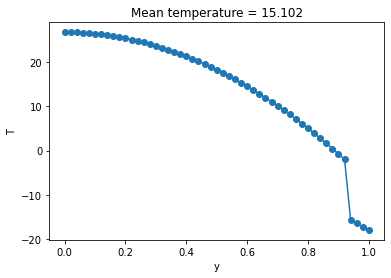

In [4]:
# Initialise the mesh with N points
N = 51
y = np.linspace(0, 1, N)

# Iterative scheme
# Form an initial guess 
# Try this one for the fake solution
Tequator = 20; Tpole = -12;
# Try this one for the true solution
# Tequator = 20
# Tpole = -12
T = Tequator + (Tpole - Tequator)*y
# T = 0*y - 9.5
# T = 0*y - 30
# T = 0*y + 30

# Run the solver
fwd = lambda T: T - myPhi(T, y)
sol = root(fwd, T)
print(sol.message)

# Plot the output
solT = sol.x;
fig = plt.figure(figsize=(6,4))
plt.plot(y, solT, '-o')
plt.xlabel('y'); plt.ylabel('T')
plt.title("Mean temperature = %1.3f" % Tbar(y, solT));

In [2]:
# 2022-23 delivery: ignore the below
# # Iterative scheme
# # Form an initial guess 
# # Try this one for the fake solution
# # Tequator = 20; Tpole = -20;
# # Try this one for the true solution
# Tequator = 20; Tpole = -12;
# T = Tequator + (Tpole - Tequator)*y
# # T = 0*y - 9.5
# # T = 0*y - 30
# # T = 0*y + 30
# plt.figure()
# for i in range(0,50):
#     T = myPhi(T,y)
#     Tb = Tbar(y,T)
#     plt.plot(i, Tb, 'o')